In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Patch

In [ ]:
datapath='/PATH/TO/DATA/'
savepath='/PATH/TO/OUTPUT/'

In [2]:
#obs
obs5d=xr.open_dataset(datapath+'obs_eke_5day_nol_2016-2020.nc')

In [3]:
#cmip ensemble members 5day means
c50s5=[]
c15s5=[]
c90s5=[]
for run in [1,2,3,4,5]:
    c50s5.append(xr.open_dataset(datapath+'c6_eke_5d_nol_r'+str(run)+'_reg_1951-1955.nc'))
    c15s5.append(xr.open_dataset(datapath+'c6_eke_5d_nol_r'+str(run)+'_reg_2016-2020.nc'))
    c90s5.append(xr.open_dataset(datapath+'c6_eke_5d_nol_r'+str(run)+'_reg_2091-2095.nc'))

In [4]:
#so3 5day means
f50=[]
f15=[]
f90=[]
for i in np.arange(5):
    f50.append(datapath+'eke_5d_nol_reg_'+str(1951+i)+'.nc')
    f15.append(datapath+'eke_5d_nol_reg_'+str(2016+i)+'.nc')
    f90.append(datapath+'eke_5d_nol_reg_'+str(2091+i)+'.nc')

seke5_ds50=xr.open_mfdataset(f50)
seke5_ds15=xr.open_mfdataset(f15)
seke5_ds90=xr.open_mfdataset(f90)

In [6]:
#area mask
accu_mask=np.ones(shape=(1440,720))
accu_mask[:,25*4:45*4]=0
accu_mask[123*4:151*4,int(40*4):]=1

In [7]:
# area_at_eq
lat_eq=110574/4
lon_eq=111320/4

In [8]:
cosweights=np.cos(np.radians(obs5d.latitude)).values
cos_lon_d=cosweights*lon_eq
areas=cos_lon_d*lat_eq

In [9]:
#weight data 

so3_5w50=seke5_ds50.eke.values*areas
so3_5w15=seke5_ds15.eke.values*areas
so3_5w90=seke5_ds90.eke.values*areas

obs5_w=obs5d.ugos*areas.reshape(1,720,1)

c50s5mw=[]
c15s5mw=[]
c90s5mw=[]
for i in np.arange(5):
    c50s5mw.append(c50s5[i].eke.values*areas)
    c15s5mw.append(c15s5[i].eke.values*areas)
    c90s5mw.append(c90s5[i].eke.values*areas)

In [10]:
#calculate area integrated eke

s5accu50=np.nansum(so3_5w50[:,accu_mask==0],axis=1)
s5accu15=np.nansum(so3_5w15[:,accu_mask==0],axis=1)
s5accu90=np.nansum(so3_5w90[:,accu_mask==0],axis=1)

oaccu5=np.nansum(obs5_w.values[:,accu_mask.T==0],axis=1)
    
c50s5_accu=[]
c15s5_accu=[]
c90s5_accu=[]
for i in np.arange(5):
    c50s5_accu.append(np.nansum(c50s5mw[i][:,accu_mask==0],axis=1))
    c15s5_accu.append(np.nansum(c15s5mw[i][:,accu_mask==0],axis=1))
    c90s5_accu.append(np.nansum(c90s5mw[i][:,accu_mask==0],axis=1))

In [11]:
# manipulate values - anoms, normalization

In [12]:
cm50ens=np.hstack(c50s5_accu)
cm15ens=np.hstack(c15s5_accu)
cm90ens=np.hstack(c90s5_accu)

In [13]:
#normalization

#cmip ensemble
cm50enorm=(cm50ens-np.mean(cm15ens))/np.std(cm15ens)
cm15enorm=(cm15ens-np.mean(cm15ens))/np.std(cm15ens)
cm90enorm=(cm90ens-np.mean(cm15ens))/np.std(cm15ens)

#cmip r1
cm50r1norm=(c50s5_accu[0]-np.mean(c15s5_accu[0]))/np.std(c15s5_accu[0])
cm15r1norm=(c15s5_accu[0]-np.mean(c15s5_accu[0]))/np.std(c15s5_accu[0])
cm90r1norm=(c90s5_accu[0]-np.mean(c15s5_accu[0]))/np.std(c15s5_accu[0])

#so3
s50norm=(s5accu50-np.mean(s5accu15))/np.std(s5accu15)
s15norm=(s5accu15-np.mean(s5accu15))/np.std(s5accu15)
s90norm=(s5accu90-np.mean(s5accu15))/np.std(s5accu15)

# Cmip members
cm50snorm=[]
cm15snorm=[]
cm90snorm=[]
for i in np.arange(5):
    cm50snorm.append((c50s5_accu[i]-np.mean(c50s5_accu[0]))/np.std(c50s5_accu[0]))
    cm15snorm.append((c15s5_accu[i]-np.mean(c15s5_accu[0]))/np.std(c15s5_accu[0]))
    cm90snorm.append((c90s5_accu[i]-np.mean(c90s5_accu[0]))/np.std(c90s5_accu[0]))

#obs
onorm=(oaccu5-np.mean(oaccu5))/np.std(oaccu5)

In [14]:
#anomalies
#cmip ens
cm50eanom=(cm50ens-np.mean(cm15ens))
cm15eanom=(cm15ens-np.mean(cm15ens))
cm90eanom=(cm90ens-np.mean(cm15ens))

#cmip r1
cm50r1anom=(c50s5_accu[0]-np.mean(c15s5_accu[0]))
cm15r1anom=(c15s5_accu[0]-np.mean(c15s5_accu[0]))
cm90r1anom=(c90s5_accu[0]-np.mean(c15s5_accu[0]))

#so3
s50anom=(s5accu50-np.mean(s5accu15))
s15anom=(s5accu15-np.mean(s5accu15))
s90anom=(s5accu90-np.mean(s5accu15))

#obs
oanom=(oaccu5-np.mean(oaccu5))

In [15]:
cads=np.asarray([np.hstack(c50s5_accu),np.hstack(c15s5_accu),np.hstack(c90s5_accu)])
labels=['a','b','c','d','e','f','g','h','i']

In [16]:
#Figure 1

/tmp/ipykernel_103995/3948649854.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v02b=sns.violinplot(data=np.asarray([None,oaccu5,None]).T,
/tmp/ipykernel_103995/3948649854.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v10=sns.violinplot(data=np.asarray([cm50eanom,cm50r1anom,s50anom,]).T,orient='v'
/tmp/ipykernel_103995/3948649854.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

(190000000000.0, 450000000000.0)

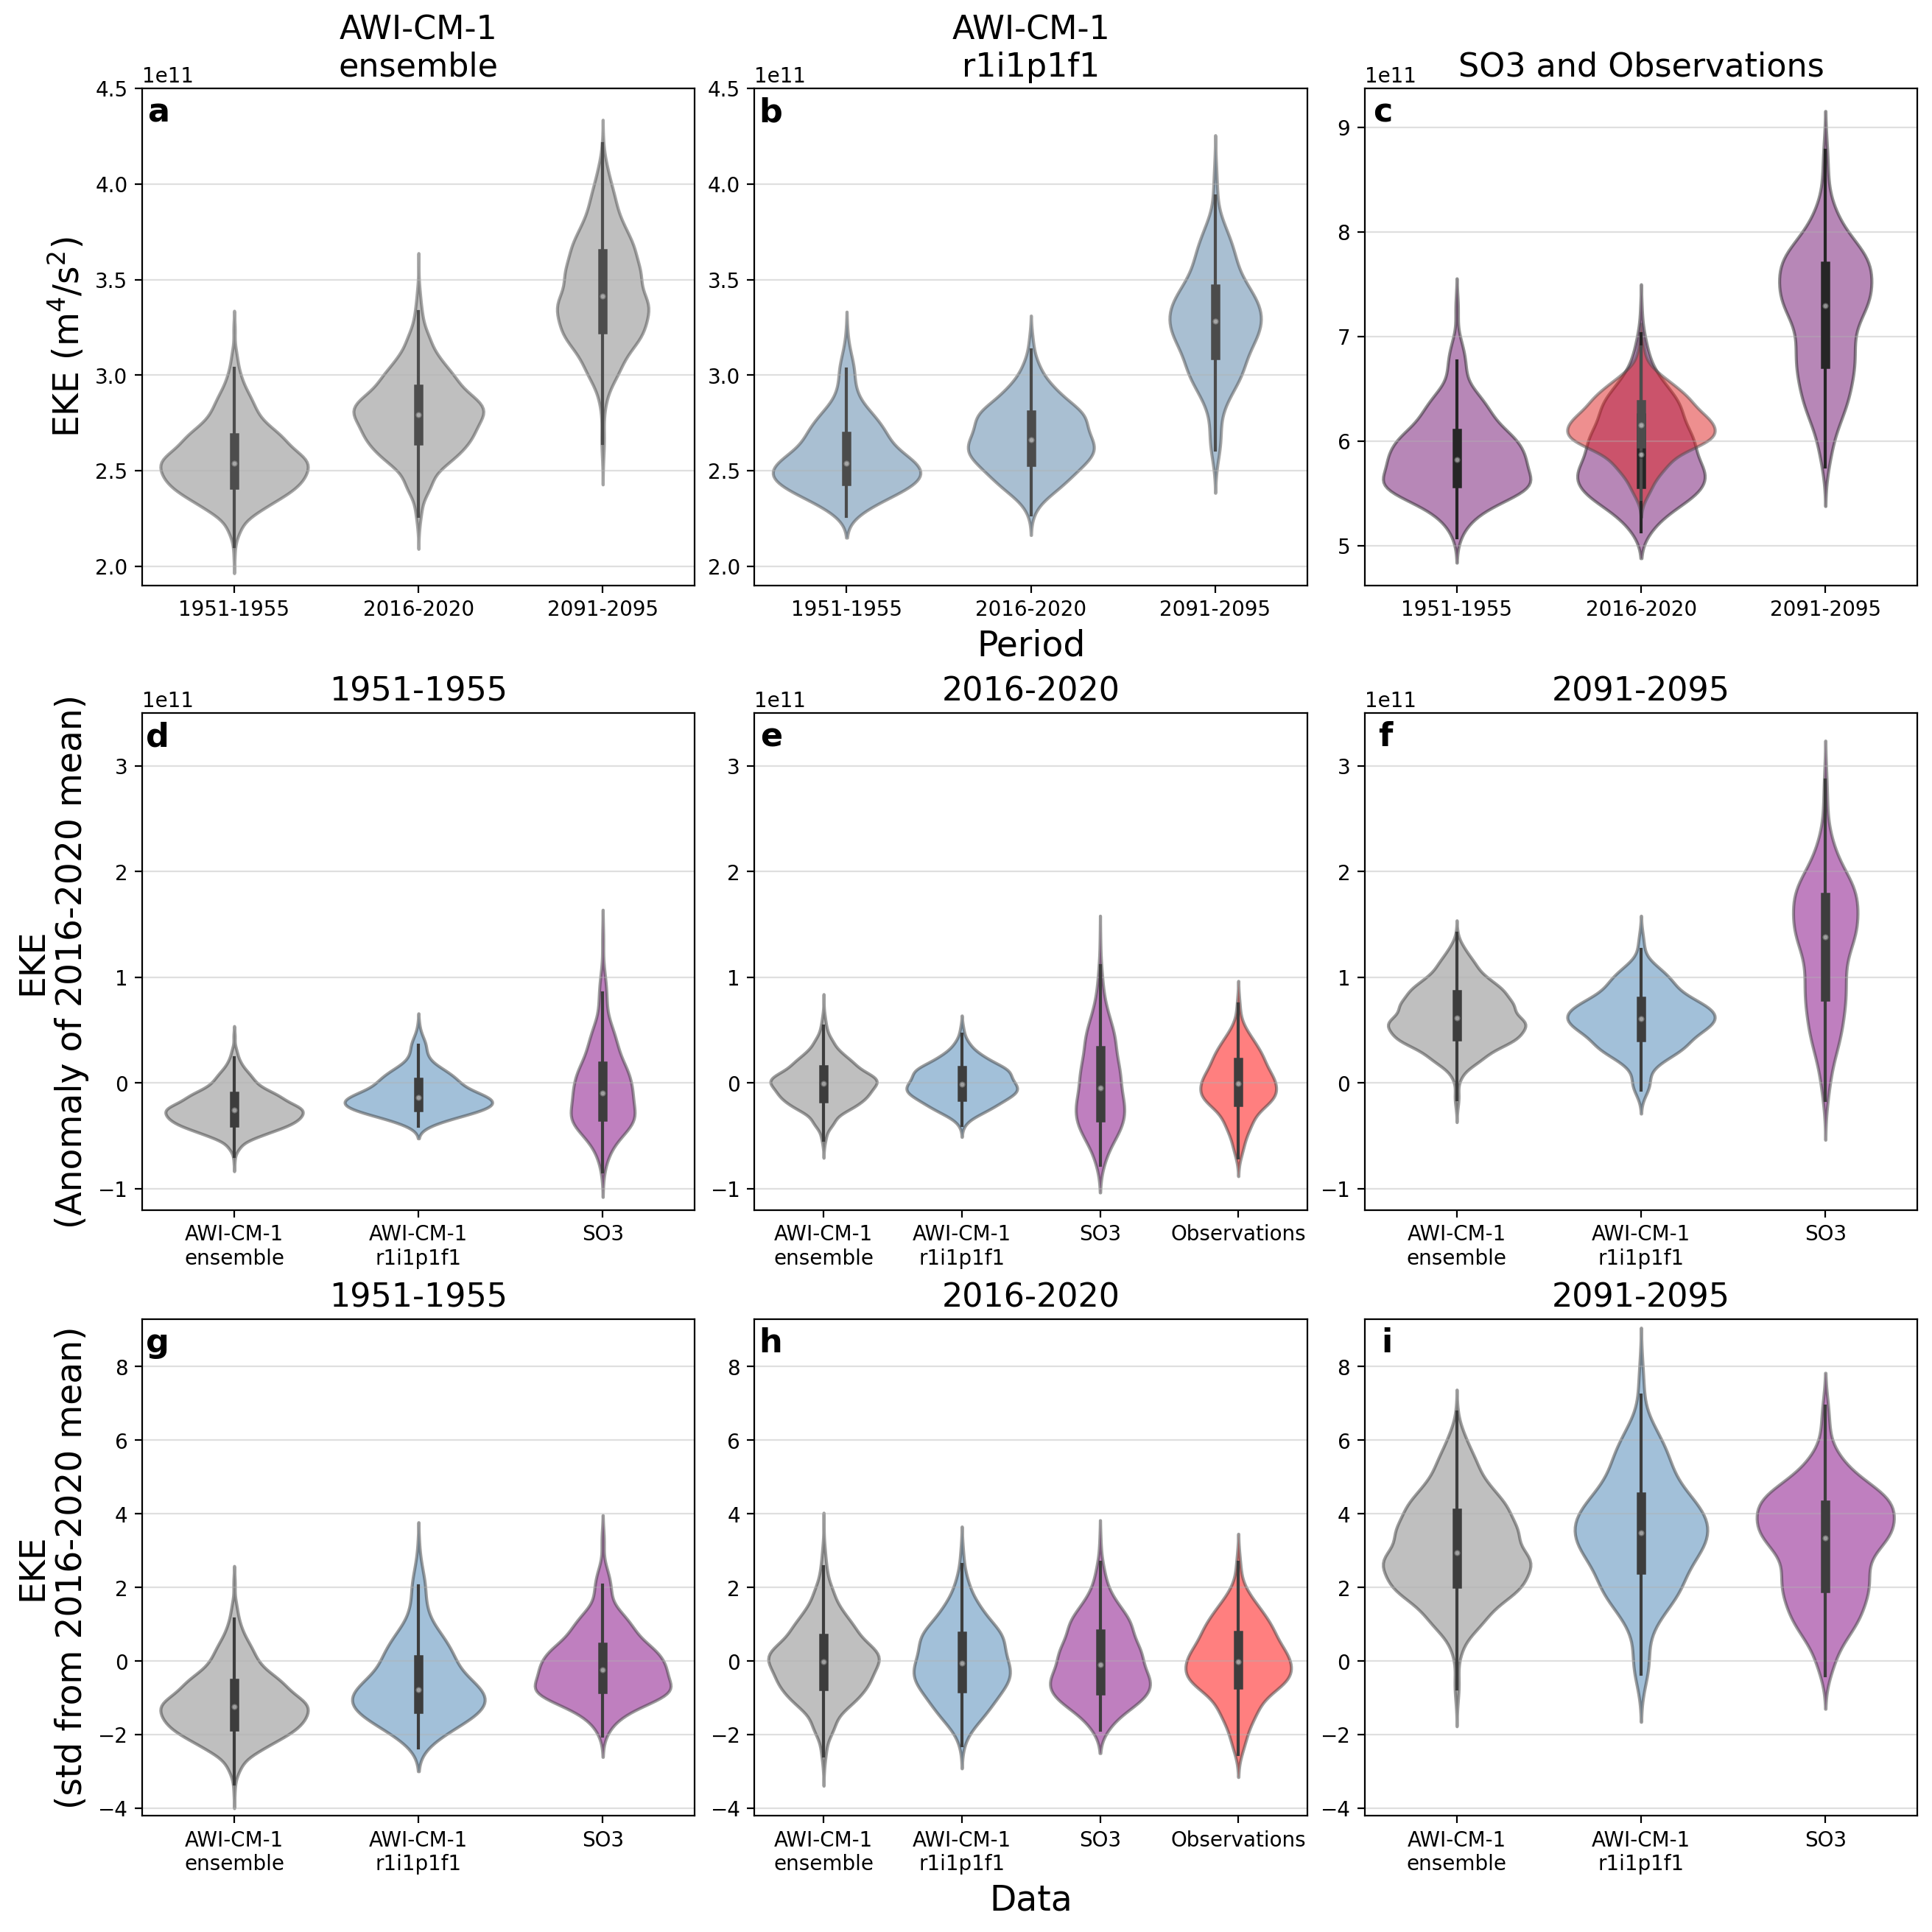

In [17]:
fig,ax=plt.subplots(3,3,figsize=(13,13),dpi=200,constrained_layout=True)

font = {'size'   : 12}
mpl.rc('font', **font)

#row1
v00=sns.violinplot(data=np.asarray([np.hstack(c50s5_accu),np.hstack(c15s5_accu),np.hstack(c90s5_accu)]).T,
                   orient='v',showmeans=True,ax=ax[0,0],color='grey')
v01=sns.violinplot(data=np.asarray([np.hstack(c50s5_accu[0]),np.hstack(c15s5_accu[0]),np.hstack(c90s5_accu[0])]).T,
                   orient='v',showmeans=True,ax=ax[0,1],color='steelblue')
v02=sns.violinplot(data=np.asarray([s5accu50,s5accu15,s5accu90]).T,
                   orient='v',showmeans=True,ax=ax[0,2],color='purple')
v02b=sns.violinplot(data=np.asarray([None,oaccu5,None]).T,
                   orient='v',showmeans=True,ax=ax[0,2],color='r')

#row2
v10=sns.violinplot(data=np.asarray([cm50eanom,cm50r1anom,s50anom,]).T,orient='v'
                       ,showmeans=True,ax=ax[1,0])
v11=sns.violinplot(data=np.asarray([cm15eanom,cm15r1anom,s15anom,oanom]).T,orient='v'
                       ,showmeans=True,ax=ax[1,1])
v12=sns.violinplot(data=np.asarray([cm90eanom,cm90r1anom,s90anom,]).T,orient='v'
                       ,showmeans=True,ax=ax[1,2])

#row3
v20=sns.violinplot(data=np.asarray([cm50enorm,cm50r1norm,s50norm,]).T,orient='v'
                       ,showmeans=True,ax=ax[2,0])
v21=sns.violinplot(data=np.asarray([cm15enorm,cm15r1norm,s15norm,onorm]).T,orient='v'
                       ,showmeans=True,ax=ax[2,1])
v22=sns.violinplot(data=np.asarray([cm90enorm,cm90r1norm,s90norm,]).T,orient='v'
                       ,showmeans=True,ax=ax[2,2])

#color
for violin, cs in zip(v10.collections[::2], ['grey','steelblue','purple']):
    violin.set_facecolor(cs)
for violin, cs in zip(v11.collections[::2], ['grey','steelblue','purple','red']):
    violin.set_facecolor(cs)
for violin, cs in zip(v12.collections[::2], ['grey','steelblue','purple']):
    violin.set_facecolor(cs)
for violin, cs in zip(v20.collections[::2], ['grey','steelblue','purple']):
    violin.set_facecolor(cs)
for violin, cs in zip(v21.collections[::2], ['grey','steelblue','purple','red']):
    violin.set_facecolor(cs)
for violin, cs in zip(v22.collections[::2], ['grey','steelblue','purple']):
    violin.set_facecolor(cs)
for axis in [v00,v01,v02,v10,v11,v12,v20,v21,v22]:
    plt.setp(axis.collections, alpha=0.5)

#format
labels=['a','b','c','d','e','f','g','h','i']
for i,axis in enumerate(ax.flatten()):
    axis.annotate(labels[i], xy=(0.05, 0.92),xycoords='axes fraction',horizontalalignment='right', 
                     verticalalignment='bottom',weight='bold',fontsize=16)
yearlab=['1951-1955','2016-2020','2091-2095']
simlab=['AWI-CM-1\nensemble','AWI-CM-1\nr1i1p1f1','SO3 and Observations']

for i in np.arange(3):
    ax[1,i].set_ylim(-1.2*10**11,3.5*10**11)
    ax[2,i].set_ylim(-4.2,9.3)
    ax[0,i].grid(axis='y',alpha=0.4)
    ax[1,i].grid(axis='y',alpha=0.4)
    ax[2,i].grid(axis='y',alpha=0.4)
    ax[0,i].set_xticks([0,1,2],labels=['1951-1955','2016-2020','2091-2095'])
    ax[2,i].set_title(yearlab[i],fontsize=16)
    ax[1,i].set_title(yearlab[i],fontsize=16)
    ax[0,i].set_title(simlab[i],fontsize=16)

ax[0,2].set_xticks([0,1,2],labels=['1951-1955','2016-2020','2091-2095'])
ax[2,1].set_xticks([0,1,2,3],labels=['AWI-CM-1\nensemble','AWI-CM-1\nr1i1p1f1','SO3','Observations'])
ax[2,0].set_xticks([0,1,2],labels=['AWI-CM-1\nensemble','AWI-CM-1\nr1i1p1f1','SO3'])
ax[2,2].set_xticks([0,1,2],labels=['AWI-CM-1\nensemble','AWI-CM-1\nr1i1p1f1','SO3'])
ax[1,1].set_xticks([0,1,2,3],labels=['AWI-CM-1\nensemble','AWI-CM-1\nr1i1p1f1','SO3','Observations'])
ax[1,0].set_xticks([0,1,2],labels=['AWI-CM-1\nensemble','AWI-CM-1\nr1i1p1f1','SO3'])
ax[1,2].set_xticks([0,1,2],labels=['AWI-CM-1\nensemble','AWI-CM-1\nr1i1p1f1','SO3'])
ax[2,0].set_xticks([0,1,2],labels=['AWI-CM-1\nensemble','AWI-CM-1\nr1i1p1f1','SO3'])

ax[0,0].set_ylabel('EKE ($\mathregular{m^4}$/$\mathregular{s^2}$)',fontsize=17)
ax[1,0].set_ylabel('EKE\n(Anomaly of 2016-2020 mean)',fontsize=17)
ax[2,0].set_ylabel('EKE\n(std from 2016-2020 mean)',fontsize=17)
ax[0,1].set_xlabel('Period',fontsize=17)
ax[2,1].set_xlabel('Data',fontsize=17)

ax[0,0].set_ylim(1.9*10**11,4.5*10**11)
ax[0,1].set_ylim(1.9*10**11,4.5*10**11)

plt.savefig(savepath+'figure_2.png',bbox_inches='tight')

In [18]:
#Figure 2

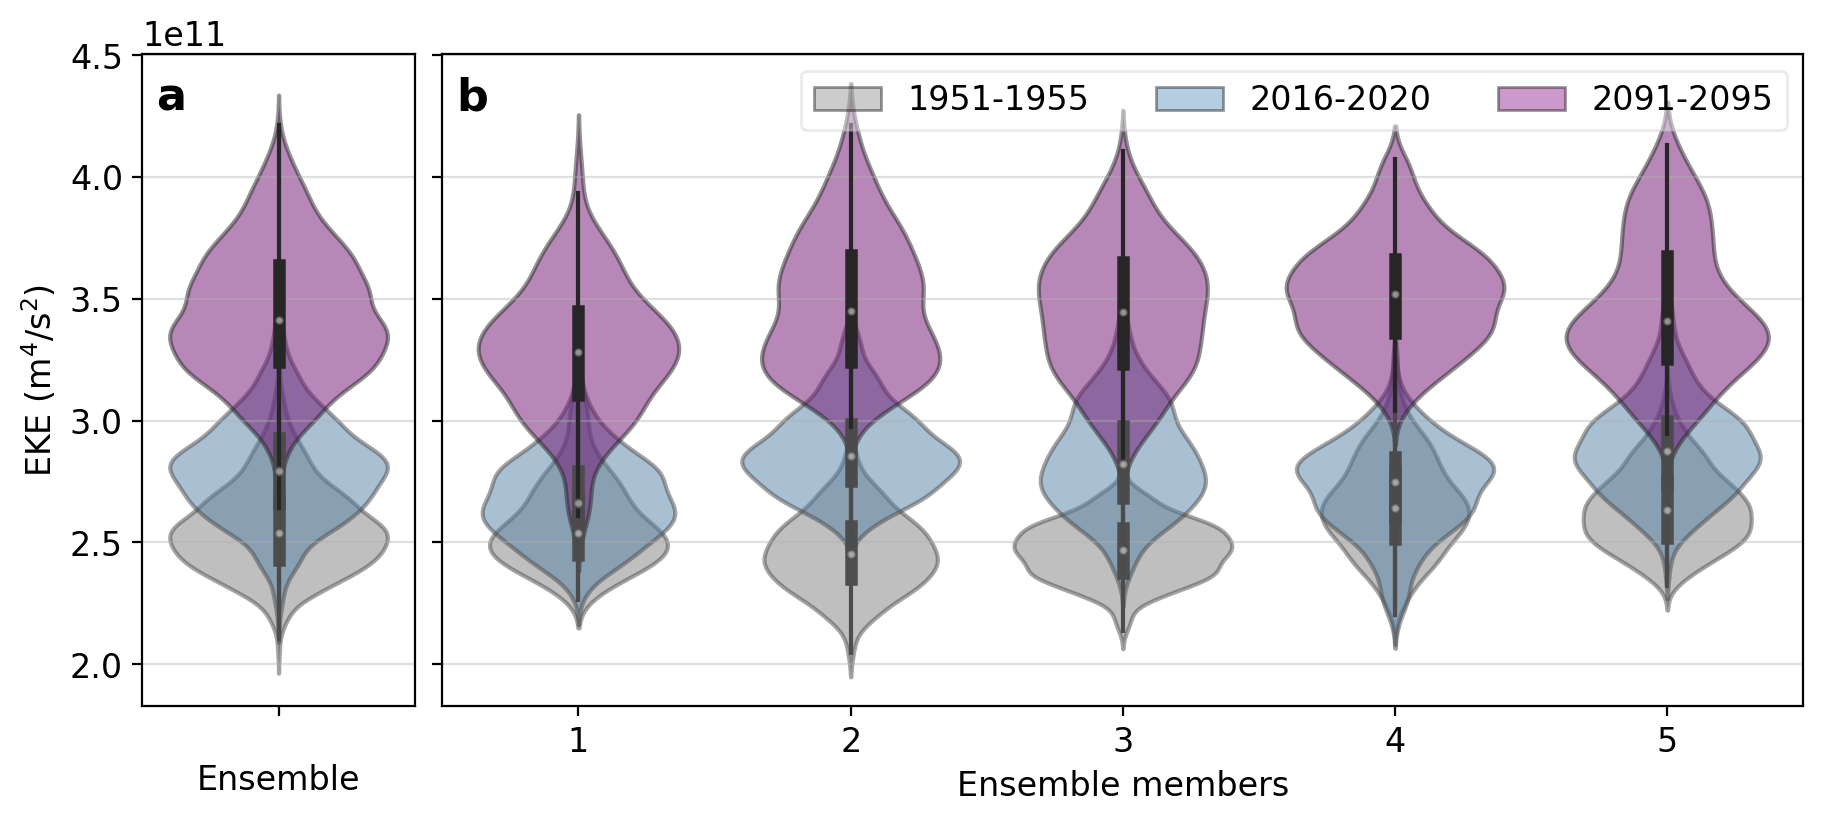

In [19]:
fig,ax=plt.subplots(1,2,figsize=(9,4),dpi=200,constrained_layout=True,gridspec_kw={'width_ratios': [1, 5]},
                    sharey=True,sharex='col',squeeze=False)
font = {'size'   : 12}
mpl.rc('font', **font)

for i in ax.flatten():
    i.grid(axis='y',alpha=0.4)
    
v00=sns.violinplot(data=np.asarray([np.hstack(c50s5_accu)]).T,
                   orient='v',showmeans=True,ax=ax[0,0],color='grey')
v01=sns.violinplot(data=np.asarray(c50s5_accu).T,
                   orient='v',showmeans=True,ax=ax[0,1],color='grey')
v10=sns.violinplot(data=np.asarray([np.hstack(c15s5_accu)]).T,
                   orient='v',showmeans=True,ax=ax[0,0],color='steelblue')
v11=sns.violinplot(data=np.asarray(c15s5_accu).T,
                   orient='v',showmeans=True,ax=ax[0,1],color='steelblue')
v20=sns.violinplot(data=np.asarray([np.hstack(c90s5_accu)]).T,
                   orient='v',showmeans=True,ax=ax[0,0],color='purple')
v21=sns.violinplot(data=np.asarray(c90s5_accu).T,
                   orient='v',showmeans=True,ax=ax[0,1],color='purple')
plt.setp(ax[0,0].collections, alpha=0.5)
plt.setp(ax[0,1].collections, alpha=0.5)

ax[0,0].set_xticks([0],labels=['\nEnsemble'])
ax[0,1].set_xticks([0,1,2,3,4],labels=['1','2','3','4','5'])
ax[0,1].set_xlabel('Ensemble members')
ax[0,0].set_ylabel('EKE ($\mathregular{m^4}$/$\mathregular{s^2}$)')

ax[0,0].annotate('a', xy=(0.05, 0.9),xycoords='axes fraction',horizontalalignment='left', 
                     verticalalignment='bottom',fontsize=16,weight='bold')
ax[0,1].annotate('b', xy=(0.01, 0.9),xycoords='axes fraction',horizontalalignment='left', 
                     verticalalignment='bottom',fontsize=16,weight='bold')

legend_elements = [Patch(facecolor='grey',edgecolor='k', alpha=0.4,label='1951-1955'),
                  Patch(facecolor='steelblue',edgecolor='k', alpha=0.4,label='2016-2020'),
                  Patch(facecolor='purple',edgecolor='k', alpha=0.4,label='2091-2095')]
plt.legend(handles=legend_elements,ncol=3,framealpha=0.4,loc='upper right')

plt.savefig(savepath+'figure_2.png',bbox_inches='tight')